# Visualizing COVID-19 Data from JHU CSSE
---  
### Data acquired from [https://github.com/CSSEGISandData/COVID-19](https://github.com/CSSEGISandData/COVID-19)

In [1]:
# Import required packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from pylab import cm

In [2]:
# Filenames of JHU data
filename_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
filename_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
filename_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
# Open JHU data files
data_confirmed = pd.read_csv(filename_confirmed)
data_recovered = pd.read_csv(filename_recovered)
data_deaths = pd.read_csv(filename_deaths)

## Define a function to extract data for specific countries
```python
covidData(country, output=1, start=100)
```
`country` &ndash; string representing Country of interest  
`output` &ndash; Type of output desired (`1` for confirmed cases, `2` for recovered cases, `3` for deaths, and `4` for net cases &ndash; default `1`)  
`start` &ndash; Return data starting at the n<sup>th</sup> case, represented by value of `start` &ndash; default `100`  

In [4]:
# Function to extract data with input country
# country - string of country name
# output - int corresponding to output choice: 1 (confirmed), 2 (recovered), 3 (deaths), 4(net)
# start - int corresponding to which case to start data set

def covidData(country, output=1, start=100):
    
    data_conf = data_confirmed[data_confirmed['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_rec = data_recovered[data_recovered['Country/Region'] == country].loc[:, '1/22/2020':].sum(axis=0)
    data_dea = data_deaths[data_deaths['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    
    # Find first non-zero index to get day 0 (first confirmed case)
    for i in range(len(data_conf)):
        if data_conf[i] >= start:
            day0 = i
            break
    
    # If output is 1 (confirmed), return aggregate confirmed cases
    if output == 1:
        return data_conf[day0:]
    
    # If output is 2 (recovered), return aggregate recovered cases
    if output == 2:
        return data_rec[day0:]
    
    # If output is 3 (deaths), return aggregate deaths
    if output == 3:
        return data_dea[day0:]
    
    # If output is 4 (net), return the net number of cases
    if output == 4:
        data_output = data_conf.subtract(data_rec).subtract(data_dea)
        return data_output[day0:]

## Dictionary to keep track of populations of countries for future analyses

In [5]:
# Populations of different countries
populations = {'Italy': 60317546, 'US': 328239523, 'Australia': 25655100, 'Korea, South': 51709098, 
               'India': 1352642280, 'Japan': 126150000, 'Singapore': 5638700, 'United Kingdom': 67545757, 
               'France': 67022000, 'Spain': 46733038, 'Denmark': 5822763, 'Iran': 83183741}

# Confirmed Cases
---   
### Load confirmed case data for different countries  
(1) &ndash; <b>Highlighted Countries</b> are shown as color traces with labels  
(2) &ndash; <b>Background Countries</b> are shown as semitransparent gray traces in the background

In [6]:
# Confirmed cases

# Highlighted countries
data_italy = covidData('Italy', 1, 100)
data_usa = covidData('US', 1, 100)
data_korea = covidData('Korea, South', 1, 100)
data_india = covidData('India', 1, 100)
data_jap = covidData('Japan', 1, 100)
data_sin = covidData('Singapore', 1, 100)
data_uk = covidData('United Kingdom', 1, 100)
data_ira = covidData('Iran', 1, 100)
data_chn = covidData('China', 1, 100)

# Background countries
data_aus = covidData('Australia', 1, 100)
data_fra = covidData('France', 1, 100)
data_esp = covidData('Spain', 1, 100)
data_den = covidData('Denmark', 1, 100)

### Plot confirmed case data and place labels next to the final data point

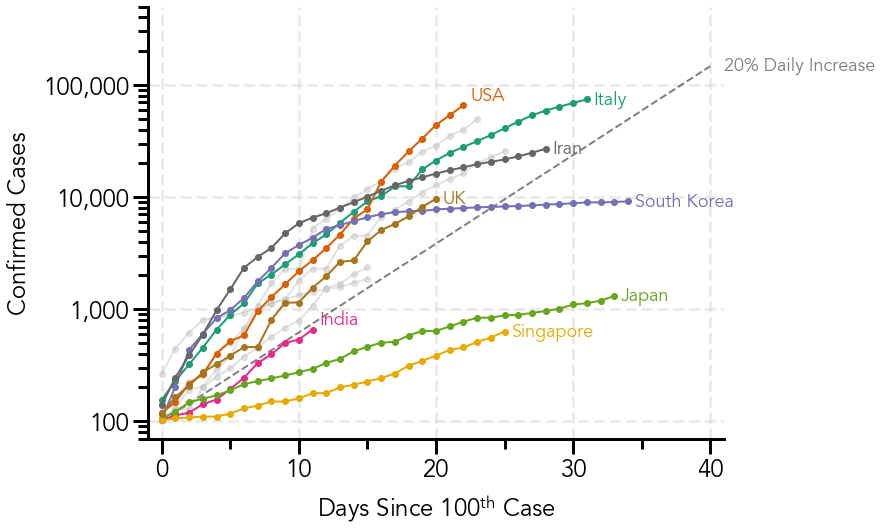

In [7]:
# Plot of confirmed cases

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 24

colors = cm.get_cmap('Dark2', 9)
color_bg = '#c6c6c6'

fig = plt.figure(figsize=(8,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yscale('log')

ax.xaxis.set_tick_params(which='major', size=15, width=3)
ax.xaxis.set_tick_params(which='minor', size=10, width=3)
ax.yaxis.set_tick_params(which='major', size=15, width=3)
ax.yaxis.set_tick_params(which='minor', size=10, width=3)

# Add grid for readability of logarithmic axes
ax.grid(color='#d9d9d9', linewidth=3, linestyle='--', alpha=0.5)

# Line for growth rate of 120%
total_days = 41
increase_120 = 100*np.ones(total_days)
for i in range(1, len(increase_120)):
    increase_120[i] = 1.2*increase_120[i-1]
ax.plot(np.arange(0, total_days, 1), increase_120, linewidth=2, linestyle='--', color='black', alpha=0.5)
ax.text(len(increase_120), increase_120[-1], '20% Daily Increase', size=18, ha='left', va='center', color='gray', backgroundcolor='white')

# Background countries
# Plot country data
ax.plot(np.arange(0, len(data_aus), 1), data_aus, marker='o', linewidth=2, color=color_bg, alpha=0.5)
ax.plot(np.arange(0, len(data_fra), 1), data_fra, marker='o', linewidth=2, color=color_bg, alpha=0.5)
ax.plot(np.arange(0, len(data_esp), 1), data_esp, marker='o', linewidth=2, color=color_bg, alpha=0.5)
ax.plot(np.arange(0, len(data_den), 1), data_den, marker='o', linewidth=2, color=color_bg, alpha=0.5)

# Highlighted Countries
# Plot country data
ax.plot(np.arange(0, len(data_italy), 1), data_italy, marker='o', linewidth=2, color=colors(0))
ax.plot(np.arange(0, len(data_usa), 1), data_usa, marker='o', linewidth=2, color=colors(1))
ax.plot(np.arange(0, len(data_korea), 1), data_korea, marker='o', linewidth=2, color=colors(2))
ax.plot(np.arange(0, len(data_india), 1), data_india, marker='o', linewidth=2, color=colors(3))
ax.plot(np.arange(0, len(data_jap), 1), data_jap, marker='o', linewidth=2, color=colors(4))
ax.plot(np.arange(0, len(data_sin), 1), data_sin, marker='o', linewidth=2, color=colors(5))
ax.plot(np.arange(0, len(data_uk), 1), data_uk, marker='o', linewidth=2, color=colors(6))
ax.plot(np.arange(0, len(data_ira), 1), data_ira, marker='o', linewidth=2, color=colors(7))
#ax.plot(np.arange(0, len(data_chn), 1), data_chn, marker='o', linewidth=2, color=colors(8))

# Annotate country names
left_pad = -0.5
ax.text(len(data_italy) + left_pad, data_italy[-1], 'Italy', size=18, ha='left', va='center',color=colors(0))
ax.text(len(data_usa) + left_pad, data_usa[-1], 'USA', size=18, ha='left', va='bottom', color=colors(1))
ax.text(len(data_korea) + left_pad, data_korea[-1], 'South Korea', size=18, ha='left', va='center', color=colors(2))
ax.text(len(data_india) + left_pad, data_india[-1], 'India', size=18, ha='left', va='bottom', color=colors(3))
ax.text(len(data_jap) + left_pad, data_jap[-1], 'Japan', size=18, ha='left', va='center', color=colors(4))
ax.text(len(data_sin) + left_pad, data_sin[-1], 'Singapore', size=18, ha='left', va='center', color=colors(5))
ax.text(len(data_uk) + left_pad, data_uk[-1], 'UK', size=18, ha='left', va='center', color=colors(6))
ax.text(len(data_ira) + left_pad, data_ira[-1], 'Iran', size=18, ha='left', va='center', color=colors(7))
#ax.text(len(data_chn) + left_pad, data_chn[-1], 'China', size=18, ha='left', va='center', color=colors(8))


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(10))
ax.set_yticklabels(['', '', '100', '1,000', '10,000', '100,000'])

ax.set_xlabel(u'Days Since 100$\mathregular{^{th}}$ Case', labelpad=10)
ax.set_ylabel('Confirmed Cases', labelpad=10)

ax.set_xlim(-1, total_days)
ax.set_ylim(70, 5*10**5)

plt.show()

# Confirmed cases daily
---  
### Define function to turn cumulative data into daily data  
```python
dailyCases(cumulative_data)
```
`cumulative_data` &ndash; array of cumulative data for specific country (output from `covidData`)

In [8]:
def dailyCases(cumulative_data):
    daily_data = cumulative_data.copy()
    for i in range(len(cumulative_data) - 1, 0, -1):
        daily_data[i] = daily_data[i] - daily_data[i-1]
    return daily_data

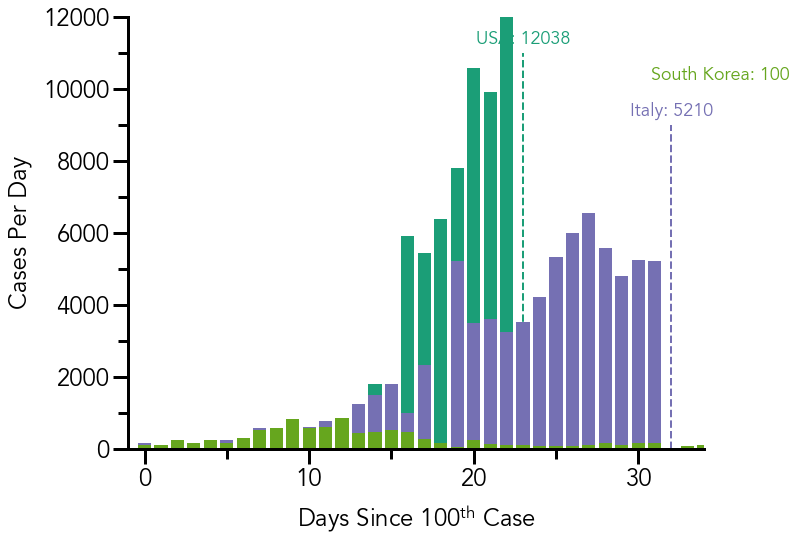

In [9]:
# Plot of confirmed cases

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 24

colors = cm.get_cmap('Dark2', 5)
color_bg = '#c6c6c6'

fig = plt.figure(figsize=(8,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_tick_params(which='major', size=15, width=3)
ax.xaxis.set_tick_params(which='minor', size=10, width=3)
ax.yaxis.set_tick_params(which='major', size=15, width=3)
ax.yaxis.set_tick_params(which='minor', size=10, width=3)

# Plot country data
ax.bar(np.arange(0, len(data_usa), 1), dailyCases(data_usa), color=colors(0), zorder=2)
ax.bar(np.arange(0, len(data_italy), 1), dailyCases(data_italy), color=colors(1), zorder=2)
ax.bar(np.arange(0, len(data_korea), 1), dailyCases(data_korea), color=colors(2), zorder=2)

# Label latest data
ax.plot([len(data_usa), len(data_usa)], [0, 11000], linestyle='--', linewidth=2, color=colors(0), zorder=1)
ax.text(len(data_usa), 11100, 'USA: ' + str(dailyCases(data_usa)[-1]), ha='center', va='bottom', size=18, color=colors(0))
ax.plot([len(data_italy), len(data_italy)], [0, 9000], linestyle='--', linewidth=2, color=colors(1), zorder=1)
ax.text(len(data_italy), 9100, 'Italy: ' + str(dailyCases(data_italy)[-1]), ha='center', va='bottom', size=18, color=colors(1))
ax.plot([len(data_korea), len(data_korea)], [0, 10000], linestyle='--', linewidth=2, color=colors(2), zorder=1)
ax.text(len(data_korea), 10100, 'South Korea: ' + str(dailyCases(data_korea)[-1]), ha='center', va='bottom', size=18, color=colors(2))

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))

ax.set_xlabel(u'Days Since 100$\mathregular{^{th}}$ Case', labelpad=10)
ax.set_ylabel('Cases Per Day', labelpad=10)

ax.set_xlim(-1, 34)
ax.set_ylim(0, 12000)

plt.show()